In [ ]:
# Feature Extraction and Feature Detection
# SIFT = Scale-Invariant Feature Transform
# ORB = Oriented FAST and Rotated BRIEF
# SURF = Speeded-Up Robust Features
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Image loaded:", image_path)

# Read image
img = cv2.imread(image_path)

# Fixed the missing '(' and the comma placement
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Saving Screenshot 2026-01-24 at 10.31.01 AM.png to Screenshot 2026-01-24 at 10.31.01 AM.png
Image loaded: Screenshot 2026-01-24 at 10.31.01 AM.png


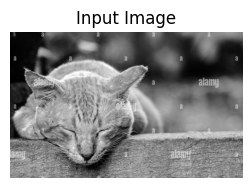

In [ ]:
# Display image
plt.figure(figsize=(3,3))
plt.imshow(gray, cmap='gray')
plt.title("Input Image")
plt.axis("off")
plt.show()
# Create ORB detector
orb = cv2.ORB_create(nfeatures=500)
# Detect and compute
kp_orb, des_orb = orb.detectAndCompute(gray, None)
# Draw keypoints
orb_img = cv2.drawKeypoints(gray, kp_orb, None)

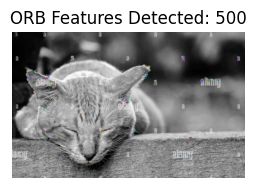

ORB Descriptor Shape: (500, 32)


In [ ]:
# Draw keypoints (finishing the previous call)
orb_img = cv2.drawKeypoints(gray, kp_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Display
plt.figure(figsize=(3,3))
plt.imshow(orb_img, cmap='gray')
plt.title(f"ORB Features Detected: {len(kp_orb)}")
plt.axis("off")
# Fixed typo: changed pit to plt
plt.show()

print("ORB Descriptor Shape:", des_orb.shape)

# Create SIFT detector
sift = cv2.SIFT_create()

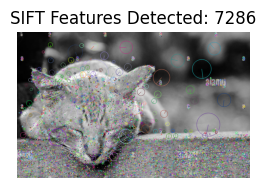

SIFT Descriptor Shape: (7286, 128)


In [ ]:
# Detect and compute
kp_sift, des_sift = sift.detectAndCompute(gray, None)

# Draw keypoints
# Fixed: Capitalized 'K' and closed the parenthesis
sift_img = cv2.drawKeypoints(
    gray, kp_sift,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display
plt.figure(figsize=(3,3))
plt.imshow(sift_img, cmap='gray')
plt.title(f"SIFT Features Detected: {len(kp_sift)}")
plt.axis("off")
plt.show()

print("SIFT Descriptor Shape:", des_sift.shape)

In [ ]:
print("SIFT Descriptor Shape:", des_sift.shape)
# SURF is patented and usually unavailable in Colab
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    kp_surf, des_surf = surf.detectAndCompute(gray, None)

    # Corrected naming and closed parenthesis
    surf_img = cv2.drawKeypoints(
        gray, kp_surf, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(3,3))
    # Removed space in 'gray'
    plt.imshow(surf_img, cmap='gray')
    plt.title(f"SURF Features Detected: {len(kp_surf)}")
    plt.axis("off")
    plt.show()
except Exception as e:
    print("SURF not available in this OpenCV version.")

SIFT Descriptor Shape: (7286, 128)
SURF not available in this OpenCV version.


In [ ]:
plt.show()

try:
    print("SURF Descriptor Shape:", des_surf.shape)
except:
    print("X SURF not supported (Patent restriction in OpenCV)")

print("===== FEATURE EXTRACTION SUMMARY =====")
print("ORB Features:", len(kp_orb))
print("SIFT Features:", len(kp_sift))

X SURF not supported (Patent restriction in OpenCV)
===== FEATURE EXTRACTION SUMMARY =====
ORB Features: 500
SIFT Features: 7286
